# Задание

Цель: применить на практике базовые ансамблевые методы

Описание задания:

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2. Подготовьте датасет к обучению моделей.
    - a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
    - b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
    - a) tree.DecisionTreeClassifier
    - b) ensemble.RandomForestClassifier

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
    - a) Повторите п. 5

8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
    - a) Повторите п. 5
    
9. Сформулируйте выводы по проделанной работе.
    - a) Сравните метрики построенных моделей.
    - b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.
Результат: получены знания по использованию базовых ансамблевых методов.

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.calibration import LinearSVC
from sklearn.ensemble import StackingClassifier

# 1. Получите данные и загрузите их в рабочую среду.

In [19]:
df = pd.read_csv("./heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Подготовка функций для обучения и добавления метрик в df

In [20]:
# Инициализация пустого df для накопления метрик
df_score = pd.DataFrame()


# Функция обучения модели и вывода report
def fit_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    report = classification_report(y_test, y_pred_model, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    return report_df


# Функция добавления метрик в df_score
def df_score_append(df_score, report, model_name):
    weighted_avg = report.loc["weighted avg"]
    df_score = pd.concat(
        [df_score, pd.DataFrame(weighted_avg).transpose().assign(model=model_name)]
    )
    return df_score

# 2. Подготовьте датасет к обучению моделей.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## a) Категориальные переменные переведите в цифровые значения.

In [22]:
df = pd.get_dummies(
    df,
    columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"],
    dtype=int,
)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


## b) *Постройте 1-2 графика на выбор.

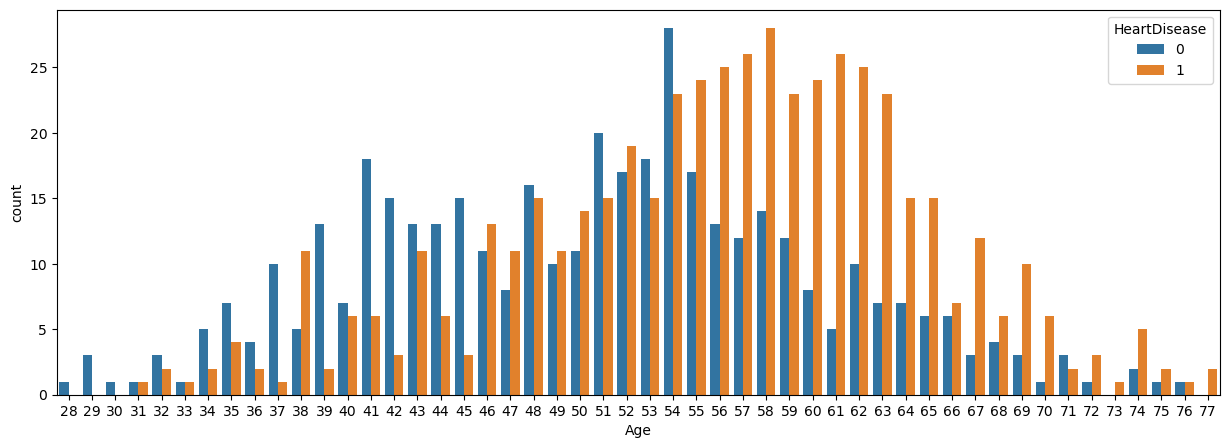

In [23]:
plt.figure(figsize=(15, 5))
sns.countplot(df, x="Age", hue="HeartDisease")
plt.show()

Прослеживается постепенное увеличение доли пациентов с заболеванием сердца по мере увеличения возраста.

Начиная с 45 группы уравниваются, а затем начинает доминировать доля с заболеванием сердца.

# 3. Разделите выборку на обучающее и тестовое подмножество.

In [24]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4,5. Обучите дерево решений на обучающем множестве. Используйте следующие модели. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

## a) tree.DecisionTreeClassifier

In [25]:
# Обучение
dtc = DecisionTreeClassifier(random_state=42)
report_df_dtc = fit_and_report(dtc, X_train, X_test, y_train, y_test)

# Складывание в df_score
df_score = df_score_append(df_score, report_df_dtc, "DecisionTreeClassifier")

In [26]:
report_df_dtc

,precision,recall,f1-score,support
0,0.727273,0.831169,0.775758,77.000000
1,0.864583,0.775701,0.817734,107.000000
accuracy,0.798913,0.798913,0.798913,0.798913
macro avg,0.795928,0.803435,0.796746,184.000000
weighted avg,0.807122,0.798913,0.800168,184.000000


## b) ensemble.RandomForestClassifier

In [27]:
# Обучение
rf = RandomForestClassifier(random_state=42)
report_df_rf = fit_and_report(rf, X_train, X_test, y_train, y_test)

# Складывание в df_score
df_score = df_score_append(df_score, report_df_rf, "RandomForestClassifier")

In [28]:
report_df_rf

,precision,recall,f1-score,support
0,0.850000,0.883117,0.866242,77.00000
1,0.913462,0.887850,0.900474,107.00000
accuracy,0.885870,0.885870,0.885870,0.88587
macro avg,0.881731,0.885484,0.883358,184.00000
weighted avg,0.886904,0.885870,0.886149,184.00000


# 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

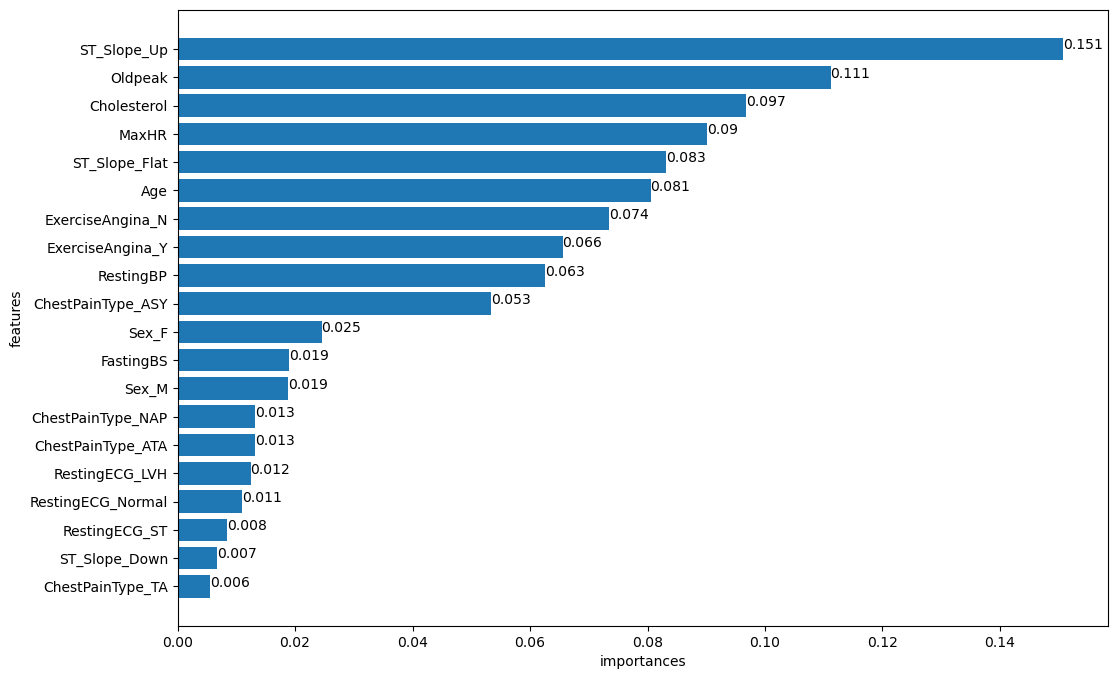

In [29]:
features = pd.Series(data=rf.feature_importances_, index=X.columns).sort_values(
    ascending=True
)

plt.figure(figsize=(12, 8))
plt.barh(features.index, features)

for i, value in enumerate(features):
    plt.text(value, i, round(value, 3))

plt.ylabel("features")
plt.xlabel("importances")
plt.show()


# 7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

In [30]:
# Обучение
bagging = BaggingClassifier(
    DecisionTreeClassifier(),
    max_samples=0.5,
    max_features=0.5,
    random_state=42,
)
report_df_bagging = fit_and_report(bagging, X_train, X_test, y_train, y_test)

# Складывание в df_score
df_score = df_score_append(df_score, report_df_bagging, "BaggingClassifier")

In [31]:
report_df_bagging

,precision,recall,f1-score,support
0,0.760870,0.909091,0.828402,77.000000
1,0.923913,0.794393,0.854271,107.000000
accuracy,0.842391,0.842391,0.842391,0.842391
macro avg,0.842391,0.851742,0.841337,184.000000
weighted avg,0.855683,0.842391,0.843446,184.000000


# 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

In [32]:
stacking = StackingClassifier(
    [
        ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
        ("RandomForestClassifier", RandomForestClassifier(random_state=42)),
        ("LinearSVC", LinearSVC(random_state=42, dual=False)),
    ]
)

report_df_stacking = fit_and_report(stacking, X_train, X_test, y_train, y_test)

# Складывание в df_score
df_score = df_score_append(df_score, report_df_stacking, "StackingClassifier")

In [33]:
report_df_stacking

,precision,recall,f1-score,support
0,0.817073,0.870130,0.842767,77.00000
1,0.901961,0.859813,0.880383,107.00000
accuracy,0.864130,0.864130,0.864130,0.86413
macro avg,0.859517,0.864971,0.861575,184.00000
weighted avg,0.866437,0.864130,0.864642,184.00000


# 9. Сформулируйте выводы по проделанной работе.

In [34]:
df_score

,precision,recall,f1-score,support,model
weighted avg,0.807122,0.798913,0.800168,184.0,DecisionTreeClassifier
weighted avg,0.886904,0.885870,0.886149,184.0,RandomForestClassifier
weighted avg,0.855683,0.842391,0.843446,184.0,BaggingClassifier
weighted avg,0.866437,0.864130,0.864642,184.0,StackingClassifier


Наилучшая модель - **Random Forest**, т.к. усреднение предсказания многих деревьев дало лучшие показатели относительно DecisionTreeClassifier.

В любом случае все ансамбли показали лушие результаты, чем DecisionTreeClassifier, как видно, недостатки одного метода помогли сгладить использование несколько разных моделей, что улучшило показатели и в итоге ансаблевые модели эффективнее выполняют задачу.